In [3]:
import pandas as pd 

bio_res = pd.read_csv(r"D:\exchange\ShanghaiTech\learning\code\diagnosisP\x_ray_constrastive\output\res_11_11_bio.csv", index_col=0)
clip_res = pd.read_csv(r"D:\exchange\ShanghaiTech\learning\code\diagnosisP\x_ray_constrastive\output\res_clip_FG_CLIP_15.csv", index_col=0)
visual_res = pd.read_csv(r"D:\exchange\ShanghaiTech\learning\code\diagnosisP\x_ray_constrastive\output\res_visual_branch_only.csv", index_col=0)
clip_vis = pd.read_csv(r"D:\exchange\ShanghaiTech\learning\code\diagnosisP\x_ray_constrastive\output\res_11_18_clip_vis.csv", index_col=0)
bio_res.rename(columns={'acc': 'bio_accuracy'}, inplace=True)
clip_res.rename(columns={'acc': 'clip_accuracy'}, inplace=True)
visual_res.rename(columns={'acc': 'visonly_accuracy'}, inplace=True)
clip_vis.rename(columns={'acc': 'clip_visonly_accuracy'}, inplace=True)
print(bio_res.head())
print(clip_res.head())
print(visual_res.head())
print(clip_vis.head())
merged_df = pd.merge(bio_res, clip_res, on='global_step')
merged_df = pd.merge(merged_df, visual_res, on="global_step")
merged_df = pd.merge(merged_df, clip_vis, on="global_step")
merged_df.set_index('global_step', inplace=True)
print(merged_df)

   global_step  bio_accuracy
0         1000      0.623830
1         2000      0.645696
2         3000      0.656694
3         4000      0.644517
4         5000      0.652570
   global_step  clip_accuracy
0         1000       0.656105
1         2000       0.654664
2         3000       0.658069
3         4000       0.641178
4         5000       0.660884
   global_step  visonly_accuracy
0         1000          0.641899
1         2000          0.658200
2         3000          0.671948
3         4000          0.662782
4         5000          0.657741
   global_step  clip_visonly_accuracy
0         1000               0.600262
1         2000               0.635745
2         3000               0.641178
3         4000               0.645434
4         5000               0.650475
             bio_accuracy  clip_accuracy  visonly_accuracy  \
global_step                                                  
1000             0.623830       0.656105          0.641899   
2000             0.645696       0.

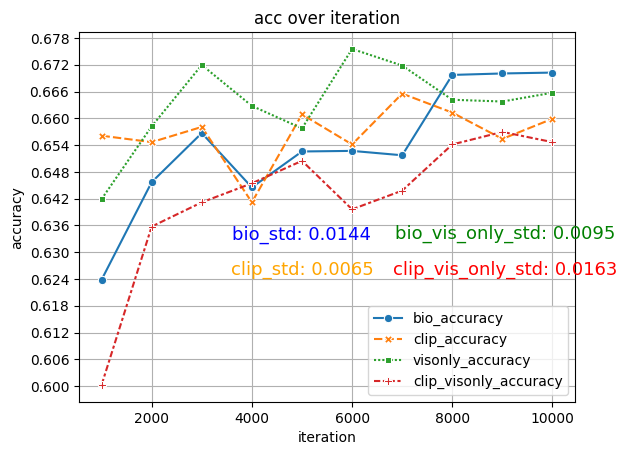

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import seaborn as sns

# merged_df.plot(kind='line', marker='o')

bio_max = merged_df.bio_accuracy.max()
clip_max = merged_df.clip_accuracy.max()
bio_std = merged_df.bio_accuracy.std()
clip_std = merged_df.clip_accuracy.std()
vis_std = merged_df.visonly_accuracy.std()
clip_vis_std = merged_df.clip_visonly_accuracy.std()
# 设置图表标题和标签
plt.title('acc over iteration')
plt.xlabel('iteration')
plt.ylabel('accuracy')
plt.gca().yaxis.set_major_locator(MaxNLocator(nbins=15))
# # for i, txt in enumerate(merged_df['bio_accuracy']):
# #     plt.text(merged_df.index[i], txt, f'{txt:.4f}', ha='left', va='bottom', fontsize=9)
# # for i, txt in enumerate(merged_df['clip_accuracy']):
# #     plt.text(merged_df.index[i], txt, f'{txt:.4f}', ha='left', va='bottom', fontsize=9)
plt.text(5000, 0.636, f'bio_std: {bio_std:.4f}', fontsize=13, ha='center', va='top', color='blue')
plt.text(5000, 0.624, f'clip_std: {clip_std:.4f}', fontsize=13, ha='center', va='bottom', color='orange')
plt.text(9060, 0.632, f'bio_vis_only_std: {vis_std:.4f}', fontsize=13, ha='center', va='bottom', color='green')
plt.text(9060, 0.624, f'clip_vis_only_std: {clip_vis_std:.4f}', fontsize=13, ha='center', va='bottom', color='red')
# 显示图表
plt.grid()
sns.lineplot(data=merged_df, markers=True)
plt.show()


In [23]:
from scipy import stats
import numpy as np
accuracy_values = merged_df["visonly_accuracy"]
mean_accuracy = np.mean(accuracy_values)
var_accuracy = np.var(accuracy_values, ddof=1)  # 使用 ddof=1 表示使用样本方差，而不是总体方差

print("visonly_accuracy 均值:", mean_accuracy)
print("visonly_accuracy 方差:", var_accuracy)
confidence_interval = stats.t.interval(0.95, len(accuracy_values) - 1, loc=mean_accuracy, scale=stats.sem(accuracy_values))

print("visonly_accuracy 95% 置信区间:", confidence_interval)


accuracy_values = merged_df["bio_accuracy"]
mean_accuracy = np.mean(accuracy_values)
var_accuracy = np.var(accuracy_values, ddof=1)  # 使用 ddof=1 表示使用样本方差，而不是总体方差

print("bio_accuracy 均值:", mean_accuracy)
print("bio_accuracy 方差:", var_accuracy)
confidence_interval = stats.t.interval(0.95, len(accuracy_values) - 1, loc=mean_accuracy, scale=stats.sem(accuracy_values))

print("bio_accuracy 95% 置信区间:", confidence_interval)


accuracy_values = merged_df["clip_accuracy"]
mean_accuracy = np.mean(accuracy_values)
var_accuracy = np.var(accuracy_values, ddof=1)  # 使用 ddof=1 表示使用样本方差，而不是总体方差

print("clip_accuracy 均值:", mean_accuracy)
print("clip_accuracy 方差:", var_accuracy)
confidence_interval = stats.t.interval(0.95, len(accuracy_values) - 1, loc=mean_accuracy, scale=stats.sem(accuracy_values))

print("clip_accuracy 95% 置信区间:", confidence_interval)


accuracy_values = merged_df["clip_visonly_accuracy"]
mean_accuracy = np.mean(accuracy_values)
var_accuracy = np.var(accuracy_values, ddof=1)  # 使用 ddof=1 表示使用样本方差，而不是总体方差

print("clip_visonly_accuracy 均值:", mean_accuracy)
print("clip_visonly_accuracy 方差:", var_accuracy)
confidence_interval = stats.t.interval(0.95, len(accuracy_values) - 1, loc=mean_accuracy, scale=stats.sem(accuracy_values))

print("clip_visonly_accuracy 95% 置信区间:", confidence_interval)

plt.figure(figure=(10, 6 ))
sns.lineplot

visonly_accuracy 均值: 0.6633584288052374
visonly_accuracy 方差: 9.103900753864178e-05
visonly_accuracy 95% 置信区间: (0.6565328964226492, 0.6701839611878256)
bio_accuracy 均值: 0.6537741407528641
bio_accuracy 方差: 0.00020594223202016515
bio_accuracy 95% 置信区间: (0.6435082773371567, 0.6640400041685716)
clip_accuracy 均值: 0.6567135842880523
clip_accuracy 方差: 4.247478413721418e-05
clip_accuracy 95% 置信区间: (0.6520514115091033, 0.6613757570670012)
clip_visonly_accuracy 均值: 0.6422258592471358
clip_visonly_accuracy 方差: 0.00026726597217943796
clip_visonly_accuracy 95% 置信区间: (0.6305310105230305, 0.6539207079712411)


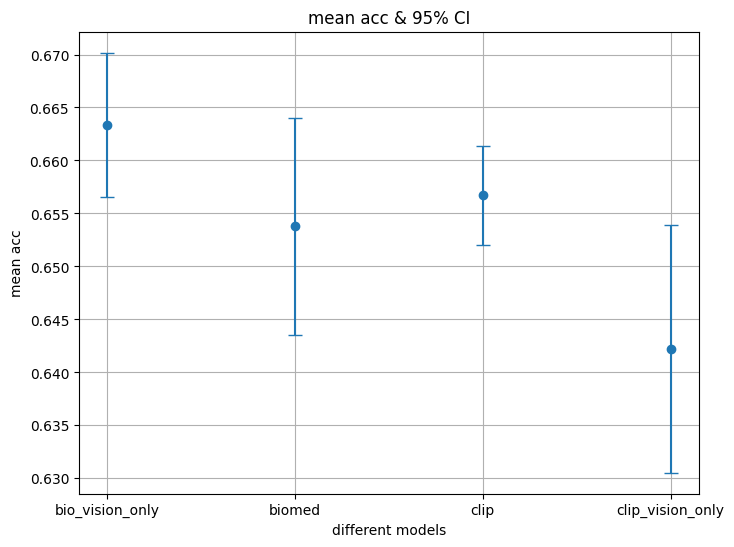

In [41]:
import matplotlib.pyplot as plt

# 示例数据
mean_values = [0.6633584288052374, 0.6537741407528641, 0.6567135842880523, 0.6422258592471358]
confidence_intervals = [(0.6565328964226492, 0.6701839611878256), (0.6435082773371567, 0.6640400041685716), (0.6520514115091033, 0.6613757570670012) , (0.6305310105230305, 0.6539207079712411)]

# 提取置信区间的半宽度
half_widths = [(upper - lower) / 2 for lower, upper in confidence_intervals]

# 绘制折线图
plt.figure(figsize=(8, 6))
plt.errorbar(x=range(1, len(mean_values) + 1), y=mean_values, yerr=half_widths, fmt='o', capsize=5)

# 添加标题和标签
plt.title('mean acc & 95% CI')
plt.xticks([1, 2, 3, 4], ['bio_vision_only', 'biomed', 'clip',  "clip_vision_only"])
plt.xlabel('different models')
plt.ylabel('mean acc')
plt.grid()

# 显示图表
plt.show()


## phased conclusions

针对训练阶段，发现了一个有意思的现象， 使用两个pre-train models : CLIP, BiomedCLIP

1. 在有限的训练次数下，biomed通过orthogonal module后，<font color=red>**起始性能不如不使用orthogonal module的version（biomed vision encoder only）**</font>， <font color=red>**但是随着训练次数的增加，biomedCLIP version 的性能逐渐提升（在vision only version 性能达到瓶颈或过拟合的时候）**</font>。同时加入orthogonal后一定程度的缓解了过拟合。 在上图中， Biomed version 的95%置信区间更大可以理解为，在整个训练过程中，该模型的性能提升更明显

2. 相反，在CLIP中，使用完整的CLIP（vision+text）encoder在起始阶段会有更好的performance，同时它的performance还更加稳定。
3. 这种现象是否能被理解为，**biomedCLIP相比于CLIP学到了更具有针对性的医学影像信息**。导致将向量正交化的操作改变原有学到的医学影像上的特定知识。而在多次迭代后，biomed FGCLIP在biomed的原有基础上学到了更适合于当前任务的embedding表征，因此在后续的训练中，acc逐渐升高
4. 相反的，**CLIP中保存的是更为general的knowledge**，因此起始阶段，直接将其正交化操作不会对医学领域的特定知识产生过大的负面影响。Oppositely，通过将相对较为general的医学知识进行正交，更有利于该pre-trained在当前任务上的performance





In [42]:
from uu import decode

df_clip_100 = pd.read_csv(r"D:\exchange\ShanghaiTech\learning\code\diagnosisP\x_ray_constrastive\output\clip_version_100step.csv")
df_clip_100.head()

,ITERATION,ACC
0,700,0.6486
1,800,0.6638
2,900,0.6636
3,1000,0.6471
4,1100,0.5554


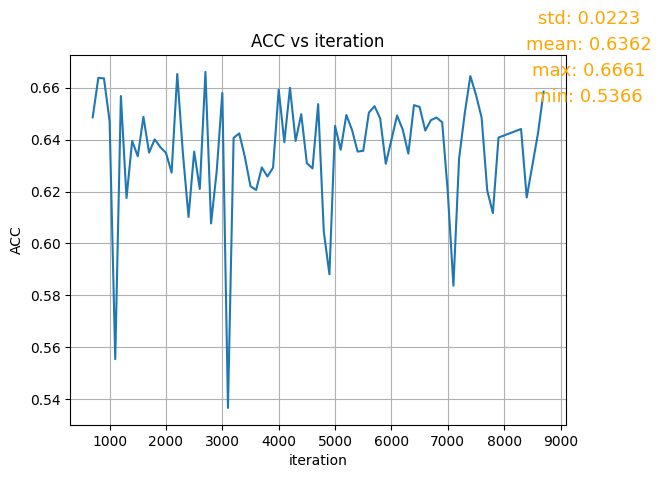

In [119]:
import seaborn as sns
from sklearn.metrics import mean_squared_error
# 使用 seaborn 的线图
sns.lineplot(x='ITERATION', y='ACC', data=df_clip_100)
# plt.plot(df_clip_100['ITERATION'], df_clip_100['ACC'], marker='o')
std = df_clip_100.ACC.std()
mean = df_clip_100.ACC.mean()
max = df_clip_100.ACC.max()
min = df_clip_100.ACC.min()
# 设置图表标题和轴标签
plt.title('ACC vs iteration')
plt.xlabel('iteration')
plt.ylabel('ACC')

plt.text(9500, 0.69, f'std: {std:.4f}', fontsize=13, ha='center', va='top', color='orange')
plt.text(9500, 0.68, f'mean: {mean:.4f}', fontsize=13, ha='center', va='top', color='orange')
plt.text(9500, 0.67, f'max: {max:.4f}', fontsize=13, ha='center', va='top', color='orange')
plt.text(9500, 0.66, f'min: {min:.4f}', fontsize=13, ha='center', va='top', color='orange')
# 显示图表
plt.grid()
plt.show()
